In [1]:
import gzip
import numpy as np
from keras.utils import to_categorical

#Funktion zum Laden der einzelnen Bilder
def open_images(filename):
    #öffnen der gzip-Datein
    with gzip.open(filename, "rb") as file:
        #Laden aller daten
        data = file.read()
        #Schreiben der Daten in ein Numpy Array und Rückgabe des Arrays
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1,28,28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename,"rb") as file:
        data = file.read()
        return np.frombuffer(data,dtype=np.uint8,offset=8)

#erstellen der Daten arrays
X_train = open_images("../Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3,3), activation="sigmoid", input_shape=(28,28,1))) # Hidden - Layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #legt alle entstandenen Ebenen nebeneinander
model.add(Dense(10,activation="softmax")) # Output - Layer - Die 10 repräsentiert die Anzahl der Ausgänge

#1. Parameter = Optimierung der Gewichtung über SGD (Stochastic Gradient Decent - Gradientenabstiegsverfahren)
# andere: rmsprop, adam - ausprobieren welche besser sind
#2. Parameter = Standardwert
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

#so lange trainieren, bis sich das loss nicht viel ändert
#ziel ist das loss zu minimieren

model.fit(
    X_train.reshape(60000,28,28,1),
    y_train,
    epochs=10, #Anzahl wie häufig die Epochen durchlaufen werden sollen
    batch_size=1000 #Nach 1000 Bildern werden die Gewichte aktualisiert
)

###Ergebnisse:
#optimizer bisher rmsprop deutlich am besten
#batch_size nicht großartig relevant - Unterschied 100 zu 1000 ca. 1%FI!

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.9160 - accuracy: 0.7017
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.5433 - accuracy: 0.8070
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4687 - accuracy: 0.8320
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.4252 - accuracy: 0.8475
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.4012 - accuracy: 0.8568
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3828 - accuracy: 0.8627
Epoch 7/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.3658 - accuracy: 0.8687
Epoch 8/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3528 - accuracy: 0.8748
Epoch 9/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.3414 - accuracy: 0.877

In [11]:
model.layers[0].weights[0]

<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 1, 10) dtype=float32>

In [14]:
#Daten werden aus dem Grafikkartenspeicher gezogen
import keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

[[[[-0.20518522 -0.1375683  -0.1754896   0.03459962 -0.11423163
    -0.11430893  0.06740379  0.03327991 -0.33354554 -0.05392713]]

  [[-0.22418134  0.09070969 -0.08724149  0.16443811 -0.08753213
     0.04543825  0.10940294 -0.0537686   0.04552344 -0.07295241]]

  [[-0.08230015  0.00671125 -0.24369806  0.01733411  0.17879723
     0.07546156 -0.16026476 -0.06528338 -0.16641934 -0.21123195]]]


 [[[ 0.04167734 -0.03744611  0.1229654  -0.01117086 -0.17672585
     0.02176183 -0.01289911 -0.19574909 -0.18893647 -0.18581647]]

  [[ 0.11231121 -0.17054367 -0.06951179  0.02123112 -0.09660461
    -0.01490051 -0.05331879 -0.00277225  0.1543285  -0.03639309]]

  [[ 0.09694358  0.23512189 -0.07718297 -0.17485803  0.01272443
     0.07163896 -0.11228492 -0.12482167  0.14128713  0.06027691]]]


 [[[ 0.11533432 -0.05580726  0.00041849 -0.20217545 -0.11743211
    -0.04767222  0.01971708  0.1345571   0.0933966   0.00786953]]

  [[ 0.12015064 -0.11302807  0.20425247  0.03089061  0.05012461
     0.06835319

In [16]:
data[:,:,:,0].reshape(3,3)

array([[-0.20518522, -0.22418134, -0.08230015],
       [ 0.04167734,  0.11231121,  0.09694358],
       [ 0.11533432,  0.12015064, -0.02351494]], dtype=float32)

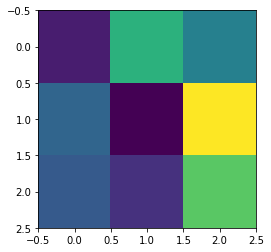

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:,:,:,1].reshape(3,3))
plt.show()

In [20]:
model2 = Sequential()

model2.add(Conv2D(10, 
                  kernel_size=(3,3), 
                  activation="sigmoid", 
                  input_shape=(28,28,1),
                 weights=model.layers[0].get_weights()))

<function matplotlib.pyplot.show(*args, **kw)>

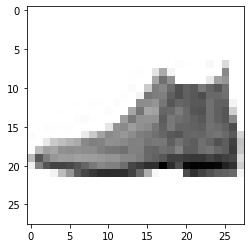

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_test[0], cmap="gray_r")
plt.show

In [27]:
result = model2.predict(X_test[0].reshape(1, 28, 28, 1))

In [28]:
result.shape

(1, 26, 26, 10)

In [30]:
result[0].shape

(26, 10)

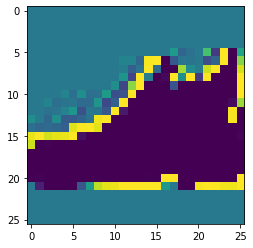

In [38]:
plt.imshow(result[0][:,:,6])
plt.show()